In [3]:
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os

import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from scipy.fft import fft, ifft

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score 




In [4]:
# Load your dataset
path = "C:\\Users\\merug\\Desktop\\ai-2\\f1\\Sleep Project Files\\Data_13.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental
0,0.00,0,0.137729,-12.104029,56.713553,0.000004
1,0.01,0,-8.952381,35.193407,17.022222,0.000004
2,0.02,0,19.052503,-18.567033,18.826374,0.000004
3,0.03,0,1.515018,52.526007,52.203175,0.000004
4,0.04,0,13.635165,-50.588278,-40.710623,0.000004


stats of all signals

In [6]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].mean()

Fpz-Cz        0.171881
Pz-Oz        -0.342918
horizontal   -2.669246
submental     0.000003
dtype: float64

In [7]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].median()

Fpz-Cz        0.137729
Pz-Oz        -0.353114
horizontal   -3.274481
submental     0.000004
dtype: float64

In [8]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].describe()

,Fpz-Cz,Pz-Oz,horizontal,submental
count,8.490000e+06,8.490000e+06,8.490000e+06,8.490000e+06
mean,1.718810e-01,-3.429178e-01,-2.669246e+00,3.225416e-06
std,1.926938e+01,1.957282e+01,9.202212e+01,1.268440e-06
min,-1.464977e+02,-2.010000e+02,-5.598552e+02,-8.433153e-07
25%,-7.575092e+00,-9.753846e+00,-3.529817e+01,3.221157e-06
50%,1.377289e-01,-3.531136e-01,-3.274481e+00,3.866626e-06
75%,8.034188e+00,9.341392e+00,2.559194e+01,3.969027e-06
max,1.568733e+02,2.000000e+02,5.226357e+02,4.992346e-06


check null values and data distribution 

In [9]:
print(df.isnull().sum())

time          0
target        0
Fpz-Cz        0
Pz-Oz         0
horizontal    0
submental     0
dtype: int64


replacing the movement data to numeric value

In [10]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
# Define a label mapping to standardize the labels
label_map = {
    'Movement time': 6,  
    '0': 0,             
    '1': 1,              
    '2': 2,              
    '3': 3,              
    '4': 4,              
    '5': 5
}

In [12]:
df[df['target']=="Movement time"]

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental


In [13]:

df['target'] = df['target'].replace(to_replace='Movement time', value=6)

In [14]:
df[df['target']==6]

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental


In [15]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

target
0    6021000
2    1251000
5     561000
3     288000
1     270000
4      99000
Name: count, dtype: int64


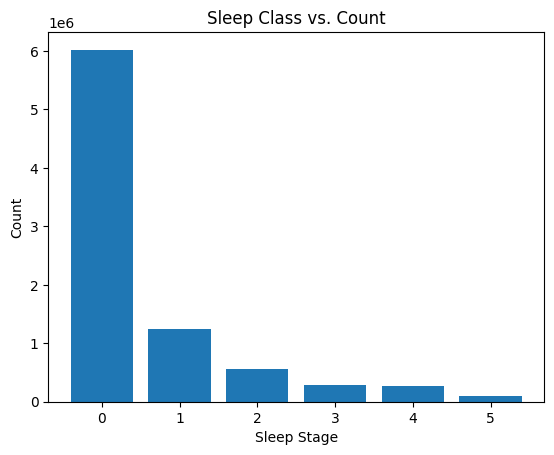

In [16]:
counts = df['target'].value_counts()
print(counts)
x = [0,1,2,3,4,5]

plt.xlabel("Sleep Stage")
plt.ylabel("Count")

plt.title('Sleep Class vs. Count')

plt.bar(x,counts)
plt.show() 

In [17]:
df = df.drop(df[df['target'] == 0].index)

In [18]:
df['target'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

Initial Class Distribution:
target
2    1251000
5     561000
3     288000
1     270000
4      99000
Name: count, dtype: int64


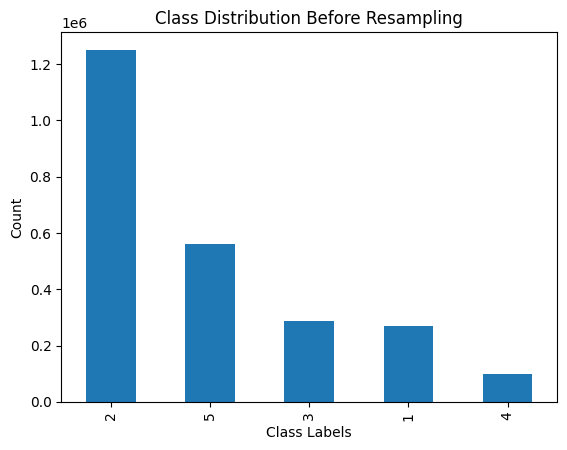

In [19]:
print("Initial Class Distribution:")
print(df['target'].value_counts())

# Plot the class distribution before resampling
df['target'].value_counts().plot(kind='bar', title='Class Distribution Before Resampling')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Visuals

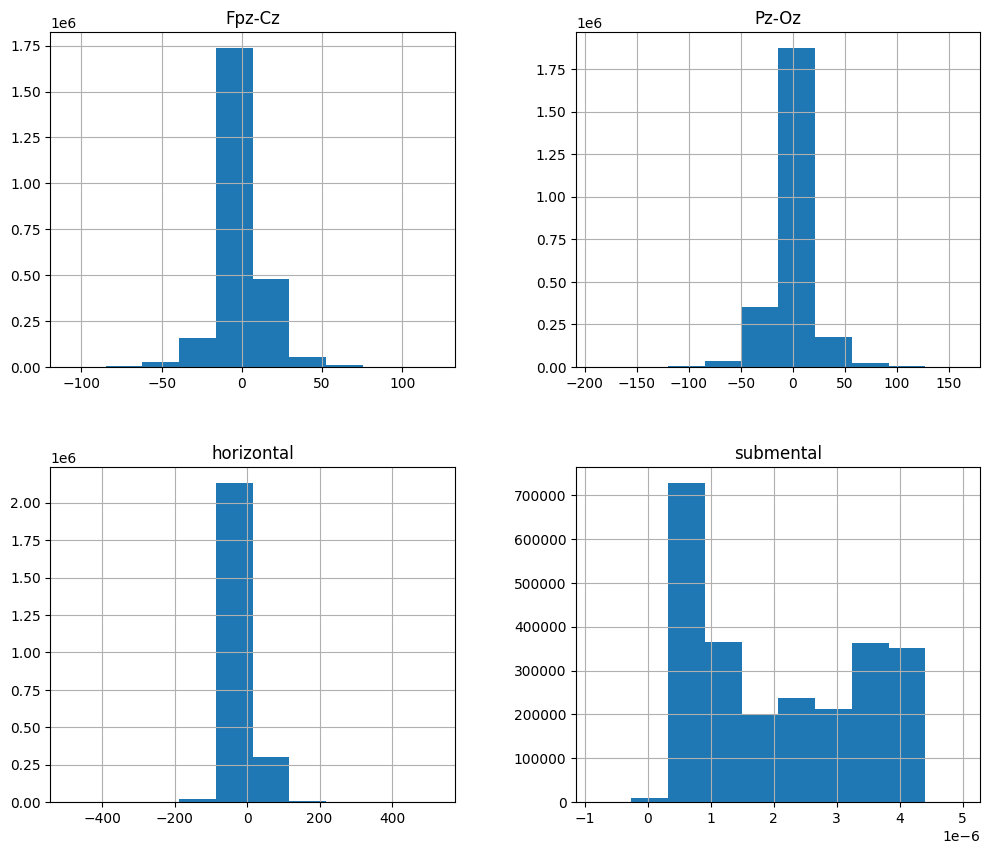

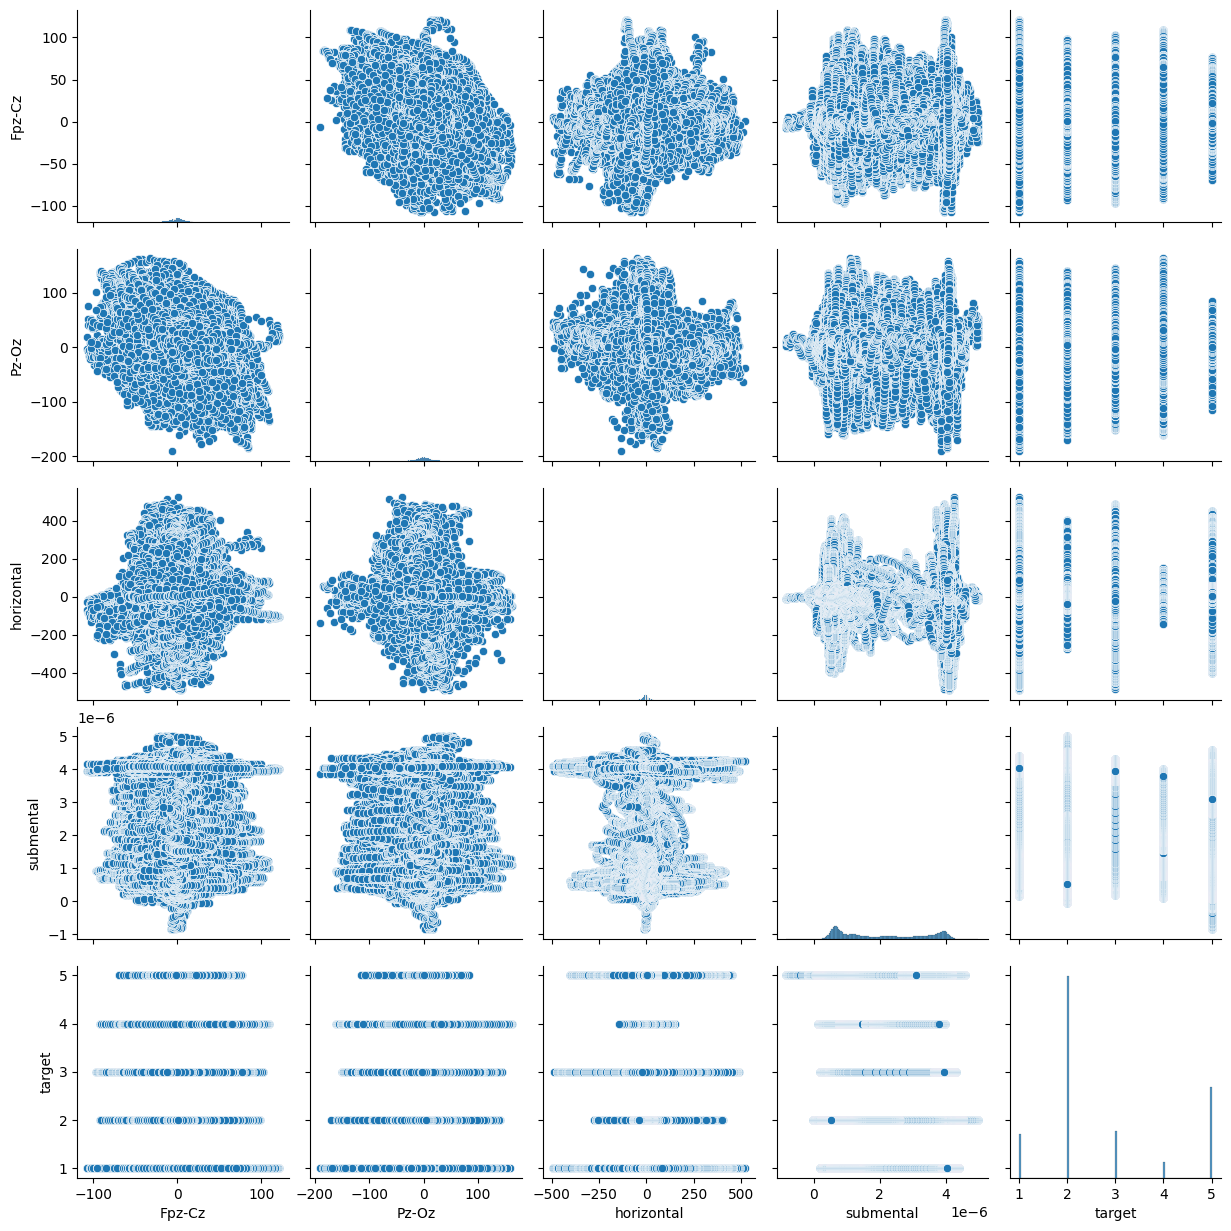

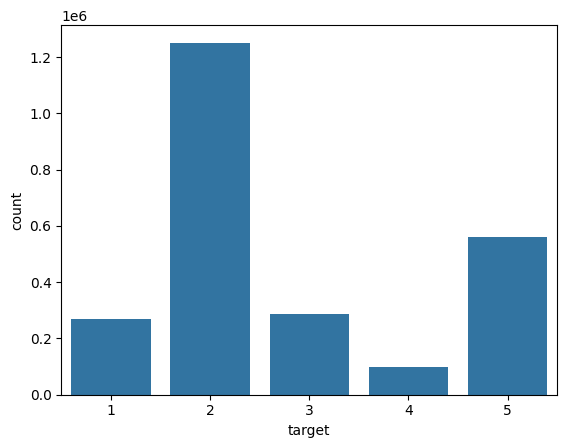

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of features
df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental']].hist(figsize=(12, 10))
plt.show()

# Visualize pairwise relationships
sns.pairplot(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']])
plt.show()

# Visualize class distribution
sns.countplot(x='target', data=df)
plt.show()


# correlation before smote

                time    target    Fpz-Cz     Pz-Oz  horizontal  submental
time        1.000000  0.162325  0.000094 -0.000049    0.000016  -0.183100
target      0.162325  1.000000  0.000228  0.000293    0.000956  -0.656836
Fpz-Cz      0.000094  0.000228  1.000000 -0.385680    0.048752  -0.000117
Pz-Oz      -0.000049  0.000293 -0.385680  1.000000   -0.016718  -0.000466
horizontal  0.000016  0.000956  0.048752 -0.016718    1.000000   0.000163
submental  -0.183100 -0.656836 -0.000117 -0.000466    0.000163   1.000000


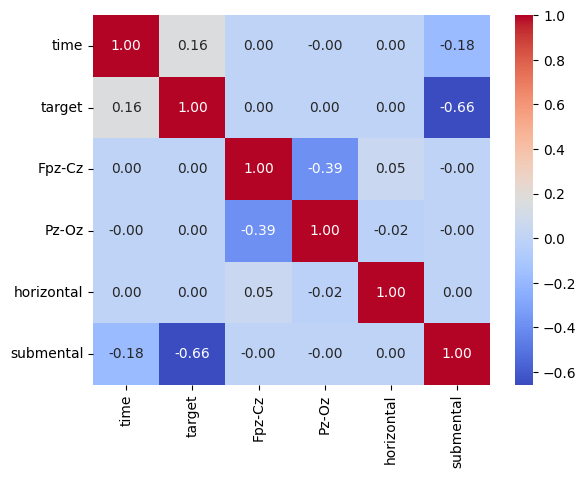

Fpz-Cz        0.000228
Pz-Oz         0.000293
horizontal    0.000956
submental    -0.656836
target        1.000000
Name: target, dtype: float64


In [21]:
# Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Check correlation with target variable
print(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']].corr()['target'])


In [22]:
from scipy.stats import chi2_contingency
import pandas as pd

# Discretize continuous variables into categories
df['Fpz-Cz_binned'] = pd.cut(df['Fpz-Cz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['Pz-Oz_binned'] = pd.cut(df['Pz-Oz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
df['submental_binned'] = pd.cut(df['submental'], bins=[-float('inf'), -0.01, 0.01, float('inf')], labels=['low', 'medium', 'high'])

# Check relationship between 'target' and individual features
for feature in ['Fpz-Cz_binned', 'Pz-Oz_binned', 'submental_binned']:
    # Create a contingency table between 'target' and the binned feature
    contingency_table = pd.crosstab(df['target'], df[feature])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"Feature: {feature}")
    print(f"Chi-square test statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:\n", expected)
    print("-" * 30)


Feature: Fpz-Cz_binned
Chi-square test statistic: 25139.552455762685
p-value: 0.0
Degrees of freedom: 12
Expected frequencies:
 [[120013.19562576  14095.11543135  12779.78128797 123111.90765492]
 [556061.13973269  65307.36816525  59212.98663426 570418.5054678 ]
 [128014.07533414  15034.78979344  13631.76670717 131319.36816525]
 [ 44004.83839611   5168.20899149   4685.91980559  45141.0328068 ]
 [249360.7509113   29286.51761847  26553.54556501 255799.18590522]]
------------------------------
Feature: Pz-Oz_binned
Chi-square test statistic: 12897.655701454645
p-value: 0.0
Degrees of freedom: 12
Expected frequencies:
 [[129591.47023086   8661.43377886   8380.38882139 123366.70716889]
 [600440.47873633  40131.30984204  38829.13487242 571599.07654921]
 [138230.90157959   9238.86269745   8939.08140948 131591.15431349]
 [ 47516.87241798   3175.85905225   3072.80923451  45234.45929526]
 [269262.27703524  17996.5346294   17412.58566221 256328.60267315]]
------------------------------
Feature: su

- Fpz-Cz_binned and Pz-Oz_binned show significant relationships with the target, based on the very low p-values (0.0). These features appear to have strong associations with the target variable.
- submental_binned, on the other hand, shows no significant relationship with the target. Its p-value is 1.0, indicating no evidence of an association between submental_binned and the target.


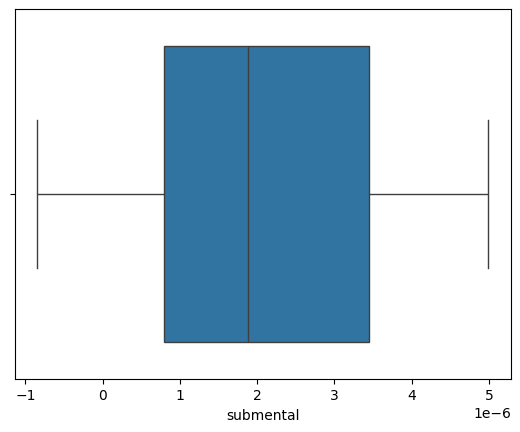

In [23]:
sns.boxplot(x=df['submental'])
plt.show()


# dropping submental column as per chi sqare analyis

In [24]:
df.head()

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental,Fpz-Cz_binned,Pz-Oz_binned,submental_binned
2541000,25410.00,1,-2.433211,15.216850,14.315995,0.000004,low,very high,medium
2541001,25410.01,1,-5.004151,13.943834,8.903541,0.000004,low,very high,medium
2541002,25410.02,1,-2.157753,11.299878,15.218071,0.000004,low,very high,medium
2541003,25410.03,1,2.157753,1.605372,11.609768,0.000004,very high,very high,medium
2541004,25410.04,1,-1.882295,-1.234432,9.354579,0.000004,low,low,medium


# After Resampiling


Class Distribution After Resampling:
Counter({1: 1251000, 2: 1251000, 3: 1251000, 4: 1251000, 5: 1251000})


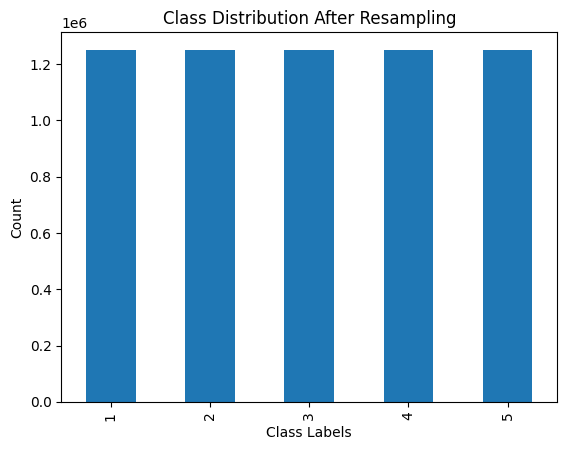

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop(columns=['target', 'submental','submental_binned','Fpz-Cz_binned','Pz-Oz_binned'])  # Features
y = df['target']  # Target

# Label encode the categorical features before applying SMOTE

# X['submental_binned'] = encoder.fit_transform(X['submental_binned'])

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show class distribution after resampling
print("\nClass Distribution After Resampling:")
print(Counter(y_resampled))

# Plot the class distribution after resampling
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class Distribution After Resampling')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()


# correleation between signals after smote

In [26]:
# # Pearson correlation matrix
# correlation_matrix = df.corr(method='pearson')
# print(correlation_matrix)

# # Visualizing the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

# # Check correlation with target variable
# print(df[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'submental', 'target']].corr()['target'])


                   time    Fpz-Cz     Pz-Oz  horizontal  Fpz-Cz_binned  \
time           1.000000 -0.000550 -0.000506   -0.001208      -0.020309   
Fpz-Cz        -0.000550  1.000000 -0.365271    0.087979       0.648331   
Pz-Oz         -0.000506 -0.365271  1.000000   -0.014884      -0.232355   
horizontal    -0.001208  0.087979 -0.014884    1.000000       0.037581   
Fpz-Cz_binned -0.020309  0.648331 -0.232355    0.037581       1.000000   
Pz-Oz_binned  -0.018080 -0.219981  0.657855   -0.032803      -0.197217   
target        -0.056719  0.000661  0.000302    0.001115       0.008946   

               Pz-Oz_binned    target  
time              -0.018080 -0.056719  
Fpz-Cz            -0.219981  0.000661  
Pz-Oz              0.657855  0.000302  
horizontal        -0.032803  0.001115  
Fpz-Cz_binned     -0.197217  0.008946  
Pz-Oz_binned       1.000000  0.003032  
target             0.003032  1.000000  


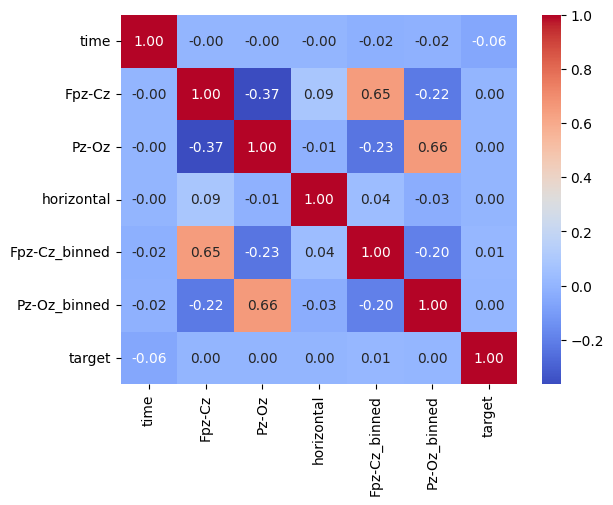

Fpz-Cz        0.000661
Pz-Oz         0.000302
horizontal    0.001115
target        1.000000
Name: target, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_resampled is the resampled features and y_resampled is the resampled target
# Re-create the full resampled data for correlation analysis (optional)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled

# Pearson correlation matrix on resampled data
correlation_matrix_resampled = df_resampled.corr(method='pearson')
print(correlation_matrix_resampled)

# Visualize the correlation matrix for resampled data
sns.heatmap(correlation_matrix_resampled, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Check correlation with target variable in resampled data
print(df_resampled[['Fpz-Cz', 'Pz-Oz', 'horizontal', 'target']].corr()['target'])


Chi-square Test for Categorical Variables

In [28]:
# from scipy.stats import chi2_contingency
# import pandas as pd

# # Discretize continuous variables into categories
# df['Fpz-Cz_binned'] = pd.cut(df['Fpz-Cz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
# df['Pz-Oz_binned'] = pd.cut(df['Pz-Oz'], bins=[-float('inf'), -1, 0, 1, float('inf')], labels=['low', 'medium', 'high', 'very high'])
# df['submental_binned'] = pd.cut(df['submental'], bins=[-float('inf'), -0.01, 0.01, float('inf')], labels=['low', 'medium', 'high'])

# # Check relationship between 'target' and individual features
# for feature in ['Fpz-Cz_binned', 'Pz-Oz_binned', 'submental_binned']:
#     # Create a contingency table between 'target' and the binned feature
#     contingency_table = pd.crosstab(df['target'], df[feature])
    
#     # Perform Chi-square test
#     chi2, p, dof, expected = chi2_contingency(contingency_table)
    
#     # Display results
#     print(f"Feature: {feature}")
#     print(f"Chi-square test statistic: {chi2}")
#     print(f"p-value: {p}")
#     print(f"Degrees of freedom: {dof}")
#     print("Expected frequencies:\n", expected)
#     print("-" * 30)


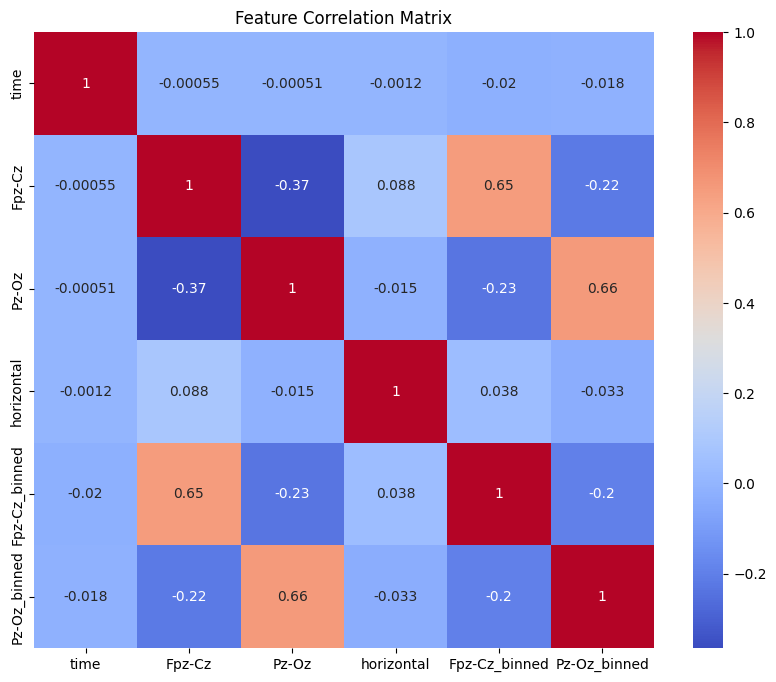

In [ ]:
correlation_matrix = X_resampled.corr()
plt.figure(figsize=(10, 8))
plt.title('Feature Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [30]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
X = df_resampled.drop(columns=['target'])
y=df_resampled['target']

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Split the data into train-test sets
# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier with optimizations
rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1)  # Optimized parameters
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")

Random Forest Classifier:
Accuracy: 0.784484412470024
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.71      0.77    250105
           2       0.55      0.84      0.67    250068
           3       0.84      0.77      0.80    250050
           4       0.93      0.93      0.93    250440
           5       0.92      0.67      0.78    250337

    accuracy                           0.78   1251000
   macro avg       0.82      0.78      0.79   1251000
weighted avg       0.82      0.78      0.79   1251000

Confusion Matrix:
[[177669  60252   3493      1   8690]
 [ 22789 209613  13745      1   3920]
 [  3820  34560 193109  17239   1322]
 [   588   1570  15843 232438      1]
 [  3959  73789   4028      0 168561]]


Train Accuracy: 0.7844172661870503
Test Accuracy: 0.784484412470024


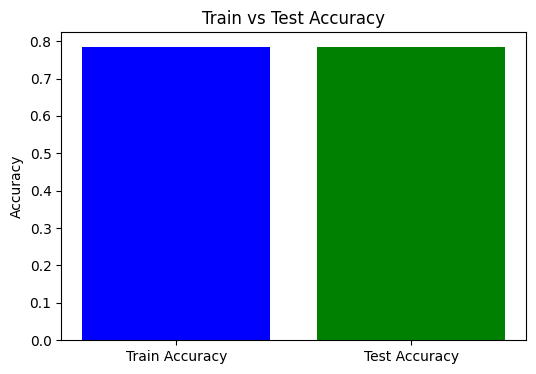

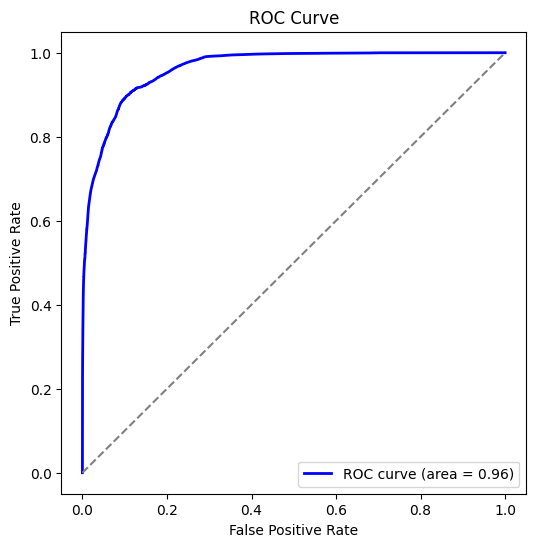

In [33]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Predict on train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot Train vs Test Accuracy
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# ROC Curve
# Binarize the output for multi-class classification
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4, 5])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), rf.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

decision tree

Decision Tree Accuracy: 0.7485035971223022
Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.62      0.72    250105
           2       0.46      0.71      0.56    250068
           3       0.94      0.76      0.84    250050
           4       0.96      0.94      0.95    250440
           5       0.75      0.70      0.73    250337

    accuracy                           0.75   1251000
   macro avg       0.79      0.75      0.76   1251000
weighted avg       0.79      0.75      0.76   1251000

Decision Tree Confusion Matrix:
[[156138  82781      0      0  11186]
 [ 25847 178703   3630      0  41888]
 [     0  44036 190556  10300   5158]
 [     0   7482   7497 235461      0]
 [     0  74817      0      0 175520]]


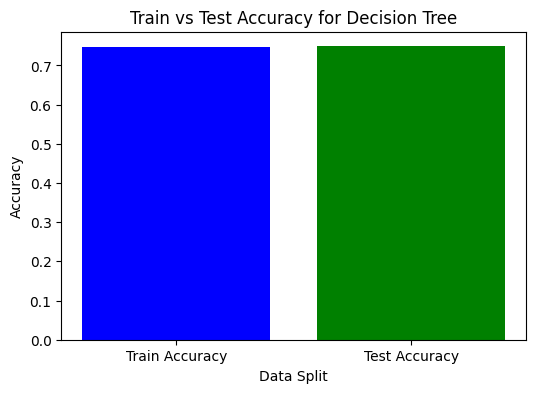

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42,max_depth=5)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Plot Train vs Test Accuracy for Decision Tree
train_accuracy = dt.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for Decision Tree")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()

# (Optional) Plot ROC curve if it's a binary classification (skipped here as it's a multi-class problem)


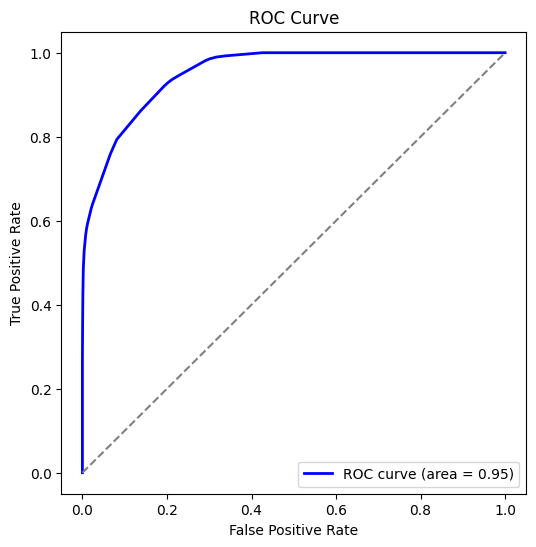

In [35]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4, 5])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), dt.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Xg Boost

c:\Users\merug\Desktop\nlp\nlp\lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.954757793764988
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    250105
           1       0.94      0.93      0.94    250068
           2       0.94      0.96      0.95    250050
           3       0.97      0.96      0.97    250440
           4       0.97      0.98      0.98    250337

    accuracy                           0.95   1251000
   macro avg       0.95      0.95      0.95   1251000
weighted avg       0.95      0.95      0.95   1251000

XGBoost Confusion Matrix:
[[235946   8562    647      0   4950]
 [  9608 232281   5563      0   2616]
 [   690   3601 239310   6449      0]
 [     0      0   9336 241104      0]
 [  2360   2216      0      0 245761]]


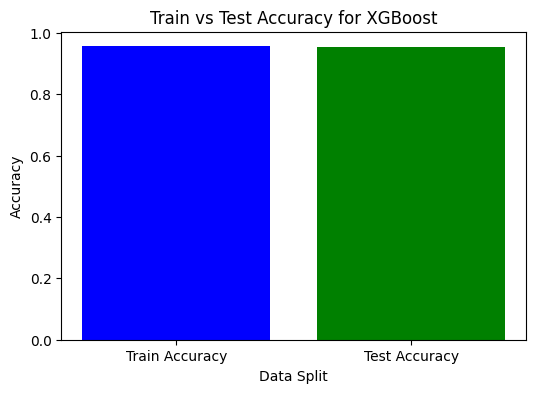

In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
y=y-1
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Plot Train vs Test Accuracy for XGBoost
train_accuracy_xgb = xgb_model.score(X_train, y_train)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy_xgb, test_accuracy_xgb], color=['blue', 'green'])
plt.title("Train vs Test Accuracy for XGBoost")
plt.xlabel("Data Split")
plt.ylabel("Accuracy")
plt.show()

# (Optional) Plot ROC curve if it's a binary classification (skipped here as it's a multi-class problem)


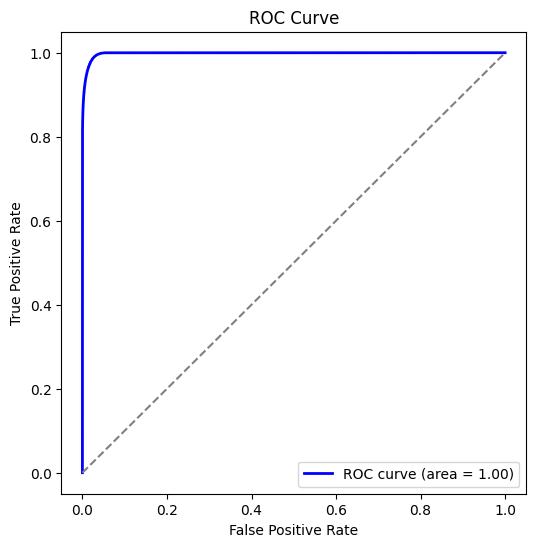

In [37]:
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
y_train_bin = label_binarize(y_train, classes=[0,1,2,3,4])

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), xgb_model.predict_proba(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()